# AIM 5001 Project 2 (Module 7) 

###### Juju Ren Oct. 2022
# The Sensitivity of Parameters to Labour Income and Statistical Assumptions
### Using PostgreSQL + Pandas for Data Management & Analysis

## Part 1: Introduction
For this project, we will utilize a dataset that evaluates the labour income level. As paremeters for effecting the level of labor income, we have attributes such as Wages, Education level, Age, Sex and Language

#### Data Source: https://vincentarelbundock.github.io/Rdatasets/csv/carData/SLID.csv
#### Data Description: https://vincentarelbundock.github.io/Rdatasets/doc/carData/SLID.html

The SLID data frame has 7425 rows and 5 columns. The data are from the 1994 wave of the Canadian Survey of Labour and Income Dynamics, for the province of Ontario. There are missing data, particularly for wages.



## Part2: Data Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/SLID.csv')
df.shape

(7425, 6)

In [3]:
df.head(5)

,Unnamed: 0,wages,education,age,sex,language
0,1,10.56,15.0,40,Male,English
1,2,11.00,13.2,19,Male,English
2,3,NaN,16.0,49,Male,Other
3,4,17.76,14.0,46,Male,Other
4,5,NaN,8.0,71,Male,English


In [36]:
df.dtypes

No.        int64
wages    float64
edu.     float64
age        int64
sex       object
lg.       object
dtype: object

As we can see, the dataset contained 7425 use cases and 6 attributes:
these attributes are as follows:
1. 'No.': Unique ID
2. 'wages': Wages, Composite hourly wage rate from all jobs.
3. 'edu.': Education level, Number of years of schooling.
4. 'age': Age, in years
5. 'sex': Sex, factor with levels: Female, Male
6. 'lg.': Language, A factor with levels: English, French, Other.

### The porpuse of the project is to find if there is any linear relation between wages and education, age, sex and languase.
#### Steps:
***
1. Create datatable with SQL, and import data from SQL portal
2. Clean data- delete all null value rows
3. Run Description Statistical Analysis with all parameters individually
4. Use OLS method to fit Wage and Numerical Variables
5. Use OLS method to fit Wage and all variables
6. Plot residuals and the X-Y figure
7. Give conclusion
***

## Part3. Data Management using PostgreSQL
### 1. Create a fully normalized SQL database schema for the data you’ve chosen to work with. 

### 2. Create an ER diagram for your proposed schema. 

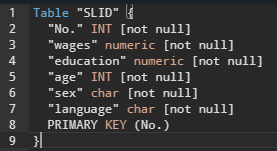 
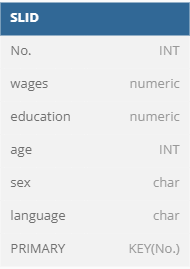

### 3. Formulate SQL statements that will create your proposed database and tables within PostgreSQL, including any required primary and foreign keys.

PRIMARY KEY (No.)

### 4. Open your PostgreSQL psql terminal and execute the SQL statements you have written to create your proposed database within your PostgreSQL

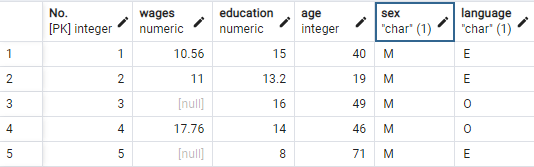

### 5. Connect to your PostgreSQL server from within your Jupyter Notebook environment and use your knowledge of Python, Pandas, and SQL to load your data set into your new PostgreSQL database. Be sure to include a query that verifies the successful execution of your SQL statements.

In [10]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [11]:
conn = ps.connect(dbname="postgres",
                   user = "postgres",
                   password = ***,
                   host = "localhost",
                   port ="5432")

In [12]:
sql = """select * from "SLID" """ 

In [15]:
df = sqlio.read_sql_query(sql, conn)

C:\Users\Jiuge\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


### 6. Using your knowledge of Python, Pandas, and PostgreSQL, read your dataset from your new PostgreSQL database into a new Pandas dataframe within your Jupyter Notebook, using whatever SQL statements and Python logic you believe to be appropriate.

In [16]:
df.head(3)

,No.,wages,education,age,sex,language
0,1,10.56,15.0,40,M,E
1,2,11.00,13.2,19,M,E
2,3,NaN,16.0,49,M,O


In [21]:
df=df.rename(columns={'education':'edu.','language':'lg.'})
df.head(3)

,No.,wages,edu.,age,sex,lg.
0,1,10.56,15.0,40,M,E
1,2,11.00,13.2,19,M,E
2,3,NaN,16.0,49,M,O


In [37]:
# check null in the dataset
df.isnull().sum()

No.         0
wages    3278
edu.      249
age         0
sex         0
lg.       121
dtype: int64

In [38]:
# drop all null rows
df = df.dropna()
df.shape

(3987, 6)

In [40]:
# check the null in dataset again
df.isnull().sum()

No.      0
wages    0
edu.     0
age      0
sex      0
lg.      0
dtype: int64

There is no null in dataset
#### Note: wage, education and age are three numeric variables, and the sex and language are the categorical variable

## Part4. Exploratory Data Analysis(EDA)
### Summary Statistics

In [41]:
#describe the dataset
describe = df.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
No.,3987.0,3711.383246,2145.823237,1.0,1836.50,3698.00,5583.00,7425.00
wages,3987.0,15.538753,7.868565,2.3,9.25,14.13,19.72,49.92
edu.,3987.0,13.337045,3.038134,0.0,12.00,13.00,15.10,20.00
age,3987.0,37.098069,12.137226,16.0,28.00,36.00,46.00,69.00


- The description of the 'No.' is not useful because it is a unique ID
- Hourly wage rate description in 1994 is showing that the mean wage is $15/hour
- education in school years is showing the average education level is 13.34 years
- the average age level is 37.09 years.

### Sample Class:Numerical Samples Count

### Wages

Text(0.5, 1.0, 'Wages Histogram')

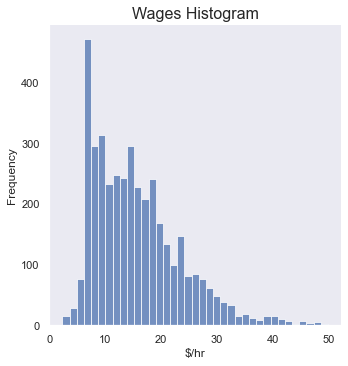

In [42]:
# seaborn histogram
sns.displot( df["wages"]),sns.set(style='dark')
plt.xlabel("$/hr"),plt.ylabel("Frequency")
plt.title("Wages Histogram",fontsize=16) 

### Edu.

Text(0.5, 1.0, 'School Year Histogram')

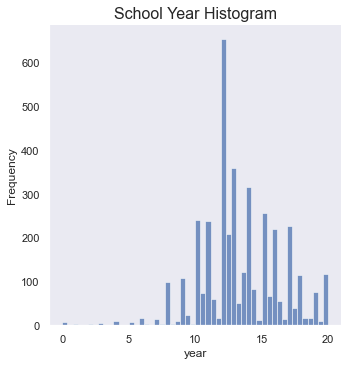

In [43]:
# seaborn histogram
sns.displot( df["edu."]),sns.set(style='dark')
plt.xlabel("year"),plt.ylabel("Frequency") 
plt.title("School Year Histogram",fontsize=16) 

### Age

Text(0.5, 1.0, 'Education Histogram')

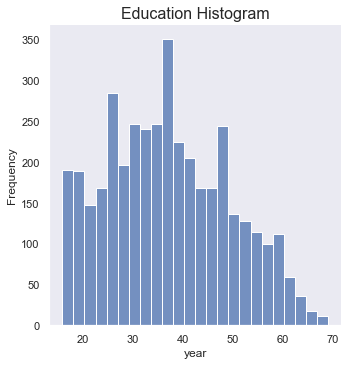

In [44]:
# seaborn histogram
sns.displot( df["age"]),sns.set(style='dark')
plt.xlabel("year"),plt.ylabel("Frequency") 
plt.title("Education Histogram",fontsize=16) 

### Sample Class: Categorized Samples Count

### Sex

In [45]:
#count samples in sex
Count= df['sex'].value_counts()
Count

F    2001
M    1986
Name: sex, dtype: int64

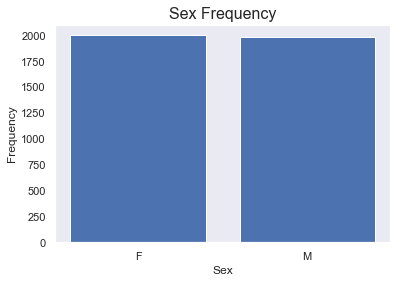

(Text(0.5, 1.0, 'Sex Frequency'), None)

In [46]:
# obtain counts for each value in sex
counts = df['sex'].value_counts()
# matplotlib frequency bar of sex
plt.bar(counts.index, counts.values)
plt.xlabel("Sex"),plt.ylabel("Frequency") 
plt.title("Sex Frequency", fontsize=16),plt.show()

### Language

We can see that the sample includes half Female and half Male

In [47]:
#count samples per sample class
Count= df['lg.'].value_counts()
Count

E    3244
O     484
F     259
Name: lg., dtype: int64

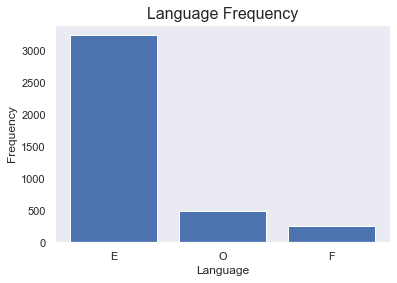

(Text(0.5, 1.0, 'Language Frequency'), None)

In [48]:
# obtain counts for each value in sex
counts = df['lg.'].value_counts()
# matplotlib frequency bar of sex
plt.bar(counts.index, counts.values)
plt.xlabel("Language"),plt.ylabel("Frequency") 
plt.title("Language Frequency", fontsize=16),plt.show()

## Part 5: Inference

### 1. Determine the relationship between Wages and other parameters

In [49]:
df

,No.,wages,edu.,age,sex,lg.
0,1,10.56,15.0,40,M,E
1,2,11.00,13.2,19,M,E
3,4,17.76,14.0,46,M,O
5,6,14.00,16.0,50,F,E
8,9,8.20,15.0,31,M,E
...,...,...,...,...,...,...
7417,7418,6.80,13.1,20,M,E
7421,7422,30.49,16.0,52,M,O
7422,7423,22.00,15.0,41,M,O
7423,7424,11.85,11.0,47,F,E


In [50]:
import statsmodels.api as sm
Y = df['wages']
X = df[['edu.','age']]
X = sm.add_constant(X)

In [51]:
ks = sm.OLS(Y, X)
ks_r =ks.fit()
ks_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wages   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     660.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          1.56e-248
Time:                        21:45:43   Log-Likelihood:                -13310.
No. Observations:                3987   AIC:                         2.663e+04
Df Residuals:                    3984   BIC:                         2.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0217      0.619     -9.729      0.000      -7.235      -4.808
edu.           0.9015      0.036     25.209      0.000       0.831       0.972
age            0.2571      0.009     28.721      0.000       0.240       0.275
==============================================================================
Omnibus:                      561.750   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1092.696
Skew:                           0.878   Prob(JB):                    5.30e-238
Kurtosis:                       4.870   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
sex_d = pd.get_dummies(df['sex'])
sex_d.head(3)

,F,M
0,0,1
1,0,1
3,0,1


the two colmuns are connected, we can just keep the first column

In [56]:
sex_d.drop(columns='M', inplace =True)
sex_d.head(3)

,F
0,0
1,0
3,0


In [57]:
lg_d = pd.get_dummies(df['lg.'])
lg_d.head(3)

,E,F,O
0,1,0,0
1,1,0,0
3,0,0,1


the three columns are connected, we can keep the first two column

In [59]:
for col in lg_d:
    print(col)

E
F
O


In [60]:
X2 = pd.concat([X, sex_d['F'],lg_d[['E','F']]],axis =1)
X2.head(3)

,const,edu.,age,F,E,F
0,1.0,15.0,40,0,1,0
1,1.0,13.2,19,0,1,0
3,1.0,14.0,46,0,0,0


In [61]:
ks2 = sm.OLS(Y, X2)
ks2_r = ks2.fit()
ks2_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wages   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          1.19e-301
Time:                        21:46:22   Log-Likelihood:                -13178.
No. Observations:                3987   AIC:                         2.637e+04
Df Residuals:                    3981   BIC:                         2.641e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2908      0.669     -6.417      0.000      -5.602      -2.980
edu.           0.9166      0.035     26.368      0.000       0.848       0.985
age            0.2551      0.009     29.278      0.000       0.238       0.272
F             -3.4554      0.209    -16.518      0.000      -3.866      -3.045
E             -0.1426      0.325     -0.439      0.661      -0.780       0.495
F             -0.1578      0.509     -0.310      0.757      -1.156       0.840
==============================================================================
Omnibus:                      596.958   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1269.036
Skew:                           0.892   Prob(JB):                    2.71e-276
Kurtosis:                       5.111   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 6: Conclusion
R Square is improved however still at a low level.
Also the P value on English ang French is significant. Which means that the language option is irrevelent to the job on this level
As we can see from the statistical analysis above, the linear regression shows a very low P-Value with all numerical variables. Which means that the numerical veriables are having strong relation with Y. 
However the R Square value shows as 0.297 which means all the parameters only having 29.7% ability to explain Y.
To analysis the reasons for getting a relatively R value, I think it could be as follows:
- Lack of other important parameters, for example, Industry that person is working in, Location of the company/person, Times of the person changing jobs, etc.
- Date the sample data required, if it takes long time to require all sample data while the macroeconomy environment changed during the period, the sample can not reflect the real situation
- Chategorical values are not explained into a good quantitiative way.

Even though the statistical analysis is showing with a R Square of 0.297, we can still try to plot the data cloud to visualize the data set and see what the data cloud look like.
Here in the following I have ploted different figures to show the data relations. 

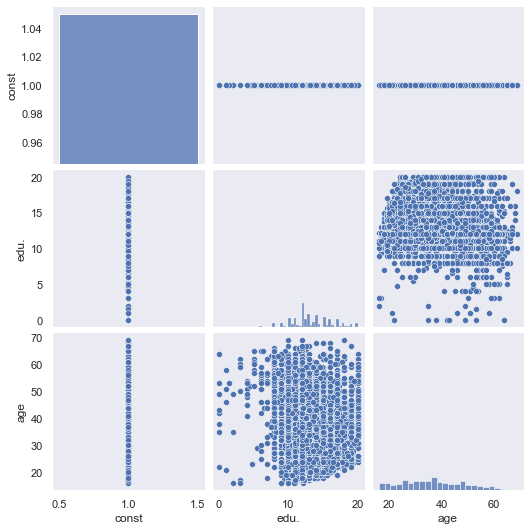

In [62]:
import seaborn as sns
sns.pairplot(X)

In [63]:
round(df.corr(),2)

,No.,wages,edu.,age
No.,1.00,0.01,-0.04,-0.00
wages,0.01,1.00,0.31,0.36
edu.,-0.04,0.31,1.00,-0.11
age,-0.00,0.36,-0.11,1.00


C:\Users\Jiuge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


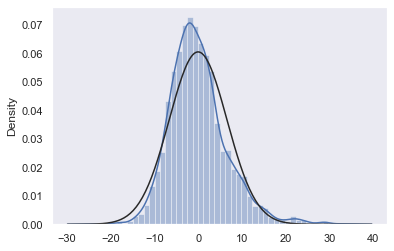

In [64]:
from scipy import stats
sns.distplot(ks2_r.resid, fit=stats.norm);

As we can see that 'French' is having a significant p-value. so we try to drop the colum and check the OLS result again

C:\Users\Jiuge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


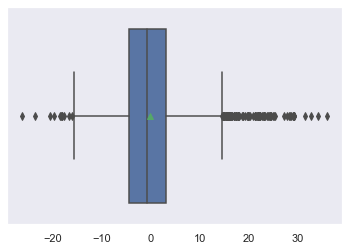

In [65]:
sns.boxplot(ks2_r.resid, showmeans=True);

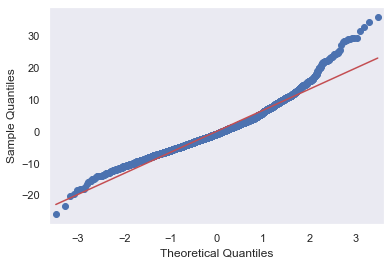

In [66]:
sm.qqplot(ks2_r.resid, line='s');

C:\Users\Jiuge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


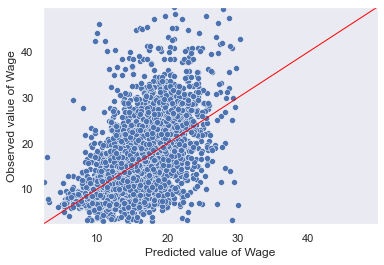

In [67]:
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(ks2_r.fittedvalues, Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Wage")
ax.set_ylabel("Observed value of Wage")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()